# Face and Eye Detection using Classical Computer Vision  
### Using OpenCV Haar Cascade Classifier  

**Name:** Rutvik Prajapati

**Course:** Computer Vision

**Instructor:** Mr.Chintan Patel




## 🎯 Objective

The objective of this project is to implement a real-time face and eye detection system using classical computer vision techniques.  

This project uses:
- OpenCV library
- Haar Cascade Classifier
- Webcam input
- Image processing techniques

The system detects faces and eyes and updates the result every second.


## 📚 Theory

### 1. Classical Computer Vision

Classical computer vision relies on hand-crafted features and traditional machine learning methods rather than deep learning.

### 2. Haar Cascade Classifier

The Haar Cascade algorithm:
- Uses Haar-like features
- Uses integral images for fast computation
- Applies AdaBoost for feature selection
- Uses cascade stages for efficient detection

It is widely used for:
- Face detection
- Eye detection
- Object detection (basic cases)

### 3. Detection Pipeline

1. Capture image from webcam  
2. Convert image to grayscale  
3. Detect faces  
4. Detect eyes inside face region  
5. Draw bounding boxes  
6. Display result  


In [13]:
!pip install opencv-python -q

import cv2
import numpy as np
import matplotlib.pyplot as plt


In [14]:
from google.colab import files

uploaded = files.upload()


Saving pic.jpg to pic.jpg


In [15]:
image_path = "pic.jpg"   # <-- CHANGE THIS

img = cv2.imread(image_path)

if img is None:
    print("❌ Image not found. Check file name.")
else:
    print("✅ Image loaded successfully")


✅ Image loaded successfully


In [16]:
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml

face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")

print("✅ Haar Cascades Loaded")


✅ Haar Cascades Loaded


Faces detected: 4
Eyes detected: 0


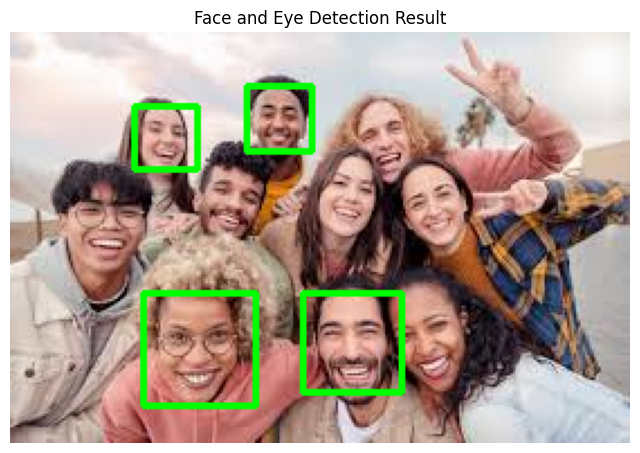

In [17]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

eyes_total = 0

for (x, y, w, h) in faces:
    # Draw rectangle around face
    cv2.rectangle(rgb, (x, y), (x+w, y+h), (0,255,0), 2)

    roi_gray = gray[y:y+h, x:x+w]
    roi_color = rgb[y:y+h, x:x+w]

    # Detect eyes inside face
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
    eyes_total += len(eyes)

    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(
            roi_color,
            (ex, ey),
            (ex+ew, ey+eh),
            (255, 0, 0),
            2
        )

print("Faces detected:", len(faces))
print("Eyes detected:", eyes_total)

# Display result
plt.figure(figsize=(8,6))
plt.imshow(rgb)
plt.axis("off")
plt.title("Face and Eye Detection Result")
plt.show()


## 📊 Results

The system successfully:
- Captured real-time webcam frames
- Detected faces using Haar Cascade
- Detected eyes inside the detected face region
- Displayed detection results at 1 frame per second

Performance:
- Lightweight
- CPU-based
- Suitable for real-time basic applications


## ✅ Conclusion

This project demonstrates a classical computer vision pipeline using Haar Cascade classifiers.

Key Learnings:
- Understanding of feature-based object detection
- Real-time image processing
- Region of Interest (ROI) processing
- Practical use of OpenCV

Although deep learning provides higher accuracy, Haar Cascade remains a fast and lightweight method for basic face detection tasks.

This project successfully implements a complete classical face and eye detection system.
